## EDA Report

In [75]:
# Installing the package
#!pip3 install -U ucimlrepo 

In [76]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [77]:
from ucimlrepo import fetch_ucirepo
diabetes_dataset = fetch_ucirepo(id=296)

# access metadata
print(diabetes_dataset.metadata.uci_id)
print(diabetes_dataset.metadata.num_instances)
print(diabetes_dataset.metadata.additional_info.summary)

# access variable info in tabular format
print(diabetes_dataset.variables)

296
101766
The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.
(1)	It is an inpatient encounter (a hospital admission).
(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.
(3)	The length of stay was at least 1 day and at most 14 days.
(4)	Laboratory tests were performed during the encounter.
(5)	Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab tests performed, HbA1c test result, diagnosis, number of medications, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalizati

In [78]:
features = diabetes_dataset.data.features # Get list of features
targets = diabetes_dataset.data.targets # Get list of targets

In [79]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  int64 
 14  numb

We have 47 features, which is a lot. We see which columns are mostly useless and empty

In [80]:
import pandas as pd
import numpy as np

missing_percent = features.isnull().mean() * 100

# Top value % (dominance of the most frequent value)
top_value_percent = features.apply(lambda col: col.value_counts(normalize=True, dropna=False).iloc[0] * 100)

summary = pd.DataFrame({
    'missing_%': missing_percent,
    'top_value_%': top_value_percent
})

print(summary)

                          missing_%  top_value_%
race                       2.233555    74.778413
gender                     0.000000    53.758623
age                        0.000000    25.615628
weight                    96.858479    96.858479
admission_type_id          0.000000    53.053083
discharge_disposition_id   0.000000    59.188727
admission_source_id        0.000000    56.496276
time_in_hospital           0.000000    17.447871
payer_code                39.557416    39.557416
medical_specialty         49.082208    49.082208
num_lab_procedures         0.000000     3.152330
num_procedures             0.000000    45.842423
num_medications            0.000000     5.980386
number_outpatient          0.000000    83.551481
number_emergency           0.000000    88.814535
number_inpatient           0.000000    66.456380
diag_1                     0.020636     6.742920
diag_2                     0.351787     6.634829
diag_3                     1.398306    11.354480
number_diagnoses    

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

summary = summary.reset_index()

missing_high = summary[summary['missing_%'] > 50][['index', 'missing_%']]



In [82]:
missing_high

,index,missing_%
3,weight,96.858479
20,max_glu_serum,94.746772
21,A1Cresult,83.277322


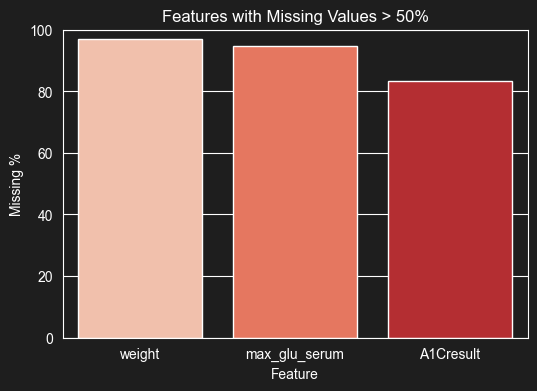

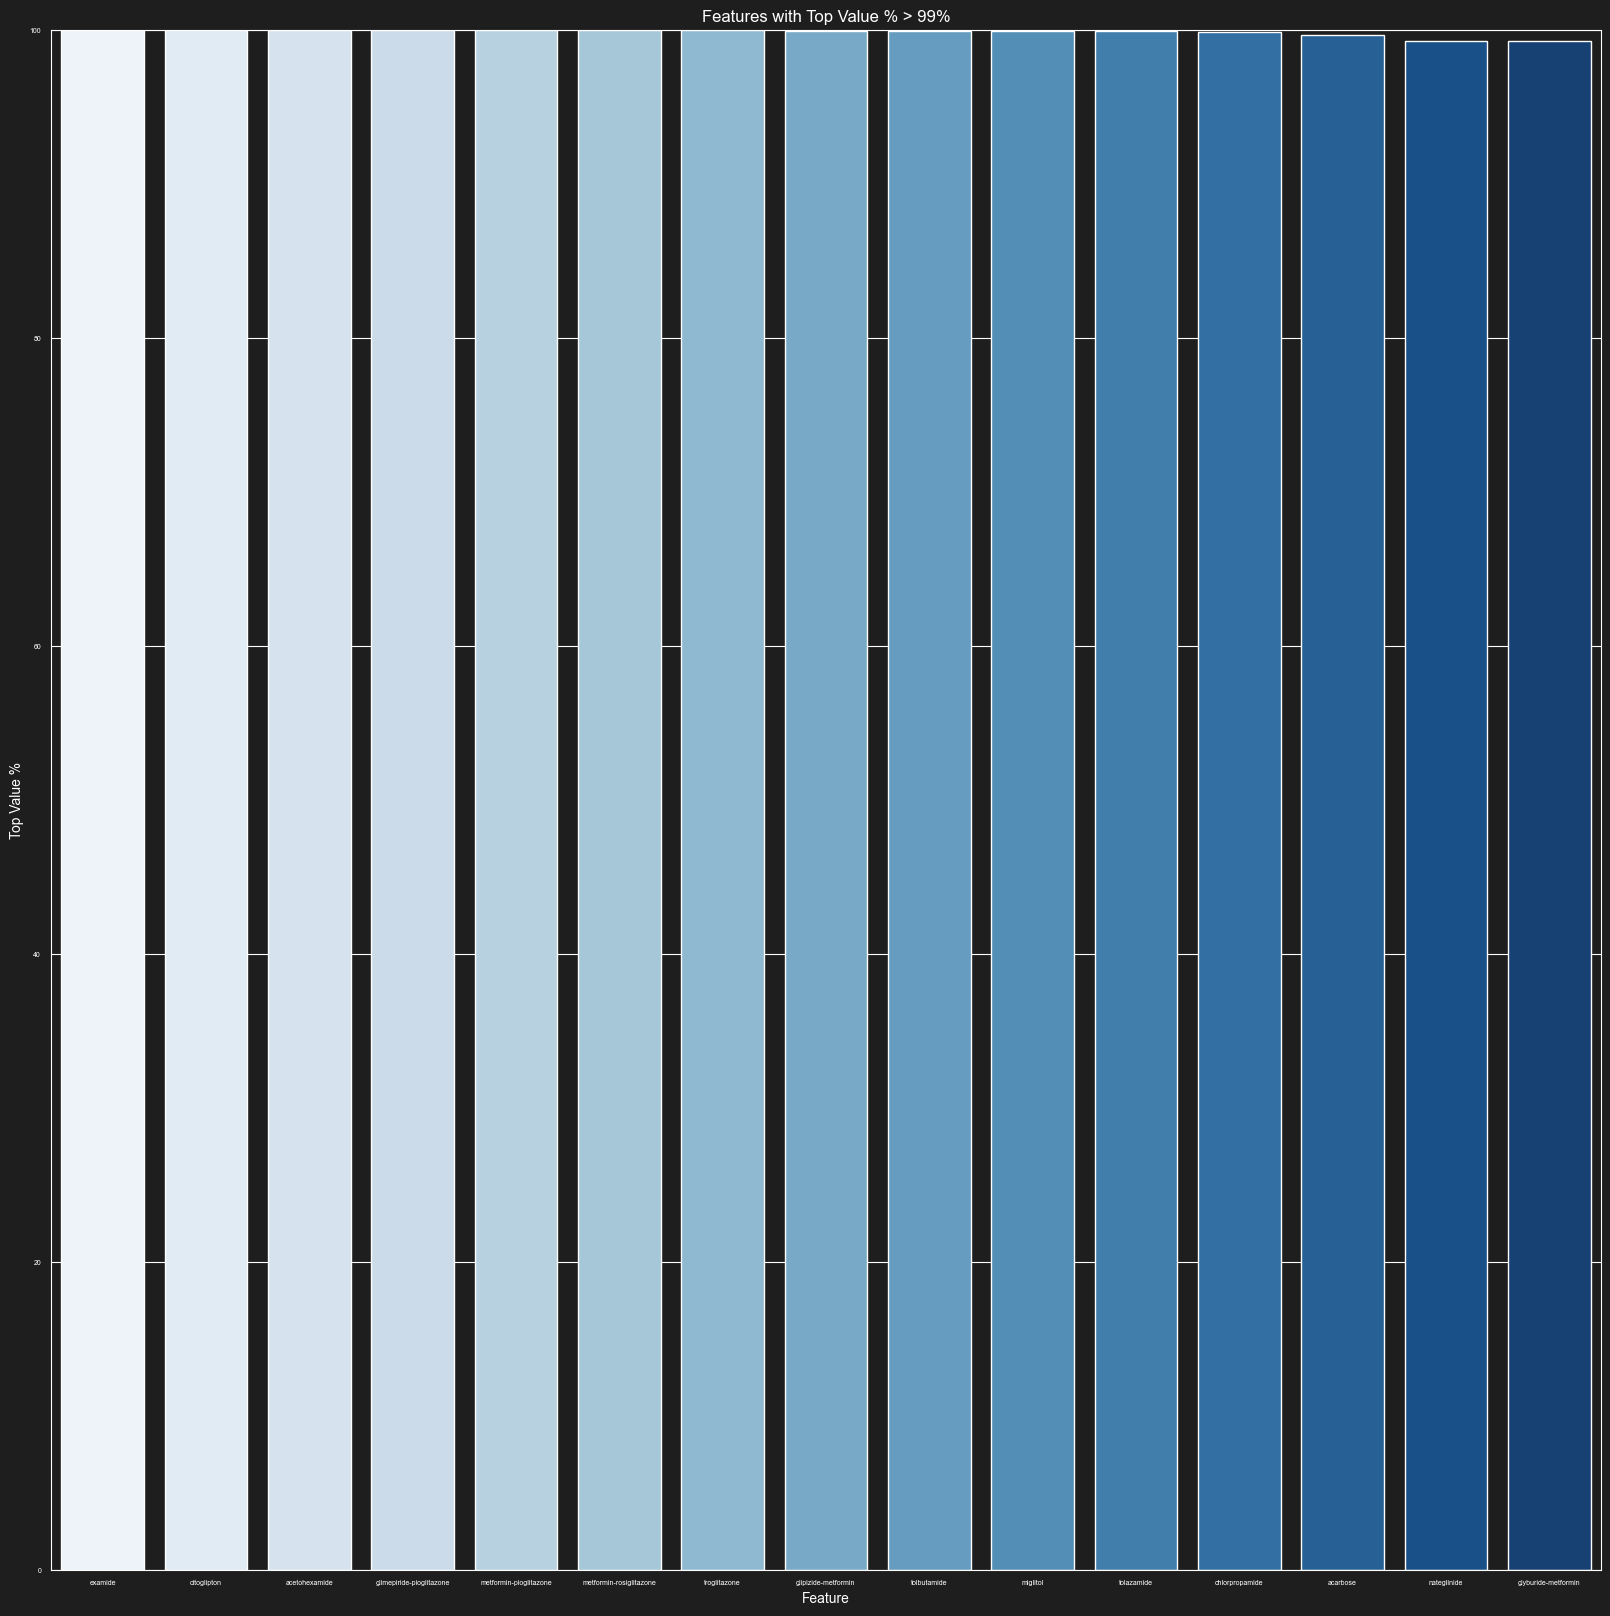

In [83]:
plt.figure(figsize=(6, 4))
sns.barplot(data=missing_high, x='index', y='missing_%', palette='Reds')
plt.title("Features with Missing Values > 50%")
plt.ylabel("Missing %")
plt.xlabel("Feature")
plt.ylim(0, 100)
plt.show()

topvalue_high = summary[summary['top_value_%'] > 99][['index', 'top_value_%']].sort_values(by = 'top_value_%', ascending = False)

plt.figure(figsize=(20, 20))
sns.barplot(data=topvalue_high, x='index', y='top_value_%', palette='Blues')
plt.title("Features with Top Value % > 99%")
plt.ylabel("Top Value %")
plt.xlabel("Feature")
plt.ylim(0, 100)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)

plt.show()

### Initial EDA summary

1. Columns 'examide' and 'citoglipton' have constant value False. We drop these columns as it has no variance that can be used for prediction.
2. Columns 'weight', 'max_glu_serum', 'A1Cresult' have columns that have over 50% missing values. We also drop these columns as well.
3. Columns that have high percentage of same values (99% and above) we will also drop. This includes 'nateglinide','chlorpropamide', 'acetohexamide', 'tolbutamide','acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'.

In [84]:
features = features.drop(columns = ['weight', 'max_glu_serum', 'A1Cresult', 'examide', 'citoglipton','nateglinide','chlorpropamide', 'acetohexamide', 'tolbutamide','acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone']) # Dropping not useful columns

In [85]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                61510 non-null   object
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

Dropped to 28 columns now.

In [86]:
features.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed
0,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,No,No,No,No,No,No,Up,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,Steady,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,No,No,No,No,No,No,Up,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,No,No,Steady,No,No,No,Steady,Ch,Yes


## Some initial distribution charts

In [87]:
import os
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_distributions_wordcloud(df, save_folder="charts", high_card_threshold=20):
    os.makedirs(save_folder, exist_ok=True)
    
    # Dark theme settings
    sns.set_style("darkgrid")
    plt.rcParams['figure.facecolor'] = '#1E1E1E'
    plt.rcParams['axes.facecolor'] = '#1E1E1E'
    plt.rcParams['text.color'] = 'white'
    plt.rcParams['axes.labelcolor'] = 'white'
    plt.rcParams['xtick.color'] = 'white'
    plt.rcParams['ytick.color'] = 'white'
    
    numeric_palette = sns.color_palette("coolwarm", 10)
    
    for col in df.columns:
        plt.figure(figsize=(6, 4))
        unique_vals = df[col].nunique(dropna=True)
        
        # Numeric variables
        if pd.api.types.is_numeric_dtype(df[col]) and unique_vals > 2:
            sns.histplot(df[col], kde=True, bins=20, color=numeric_palette[5])
            plt.title(f'{col} (Numeric)', fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('Count', fontsize=10)
            
            # Compute stats
            stats = df[col].describe()
            skewness = df[col].skew()
            kurt = df[col].kurtosis()
            
            # Prepare annotation text
            stat_text = (
                f"Mean: {stats['mean']:.2f}\n"
                f"Median: {df[col].median():.2f}\n"
                f"Std: {stats['std']:.2f}\n"
                f"Skew: {skewness:.2f}\n"
                f"Kurt: {kurt:.2f}"
            )
            
            # Add text box inside plot
            plt.gca().text(
                0.98, 0.95, stat_text,
                transform=plt.gca().transAxes,
                fontsize=8, color='white',
                ha='right', va='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="#333333", edgecolor="white", alpha=0.6)
            )
        
        # High-cardinality categorical → Word Cloud
        elif pd.api.types.is_object_dtype(df[col]) and unique_vals > high_card_threshold:
            text = ' '.join(df[col].astype(str))
            wc = WordCloud(width=800, height=400, background_color="#1E1E1E",
                           colormap="viridis", contour_color='white', contour_width=0.5).generate(text)
            plt.imshow(wc, interpolation='bilinear')
            plt.axis('off')
            plt.title(f'{col} (High-cardinality Word Cloud)', fontsize=12, color='white')
        
        # Moderate cardinality categorical → countplot sorted
        else:
            counts = df[col].value_counts()
            order = counts.index
            sns.countplot(data=df, x=col, palette='pastel', order=order)
            plt.title(f'{col} (Categorical)', fontsize=12)
            plt.ylabel('Count', fontsize=10)
            plt.xlabel(col, fontsize=10)
        
        plt.xticks(fontsize=8, rotation=45)
        plt.yticks(fontsize=8)
        plt.show()

        filename = os.path.join(save_folder, f"{col}_distribution.png")
        plt.savefig(filename, bbox_inches='tight', dpi=300)
        plt.close()


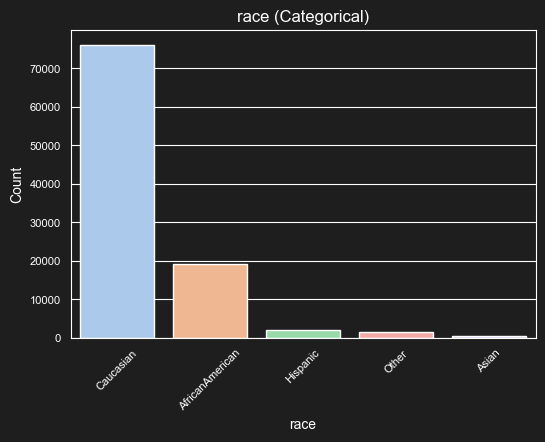

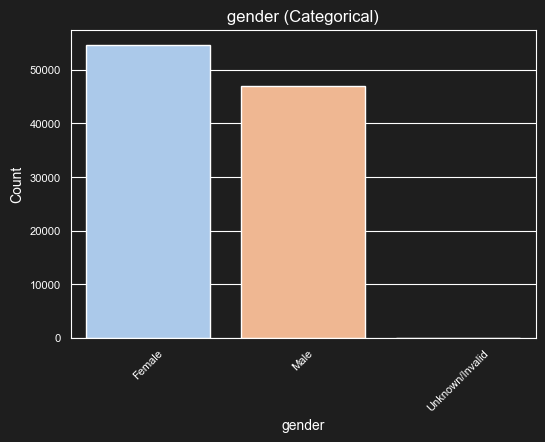

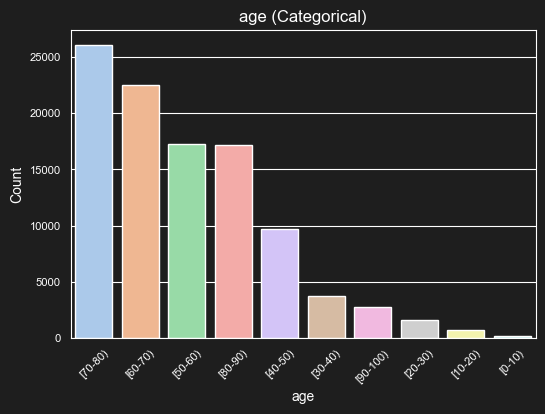

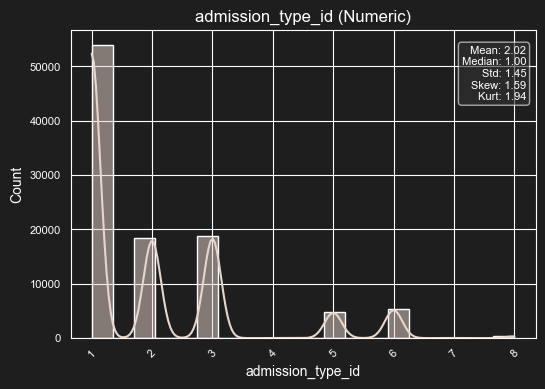

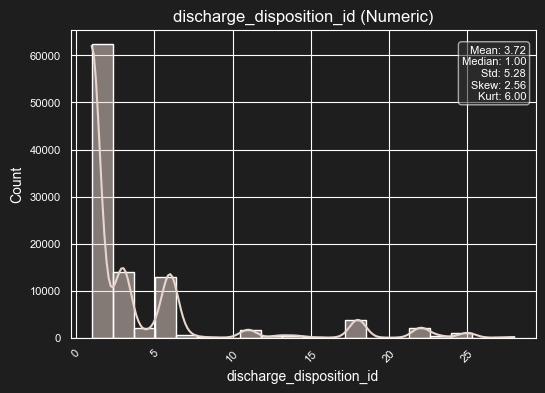

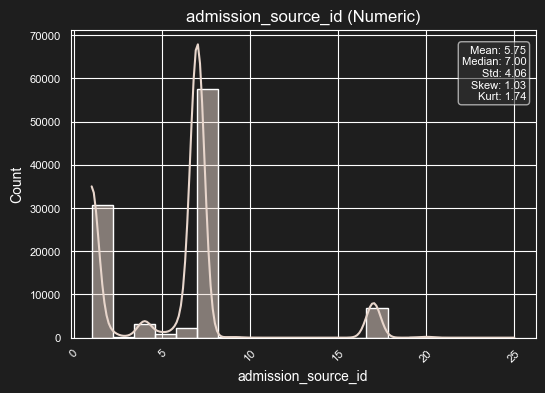

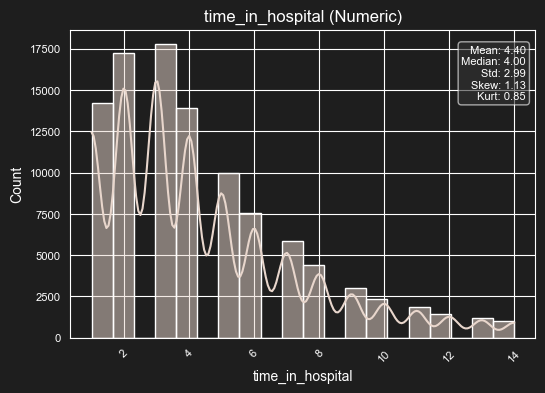

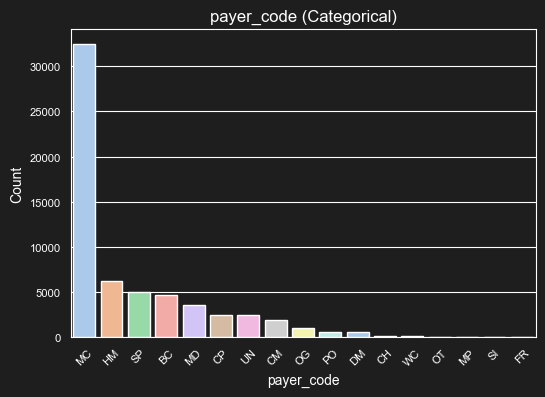

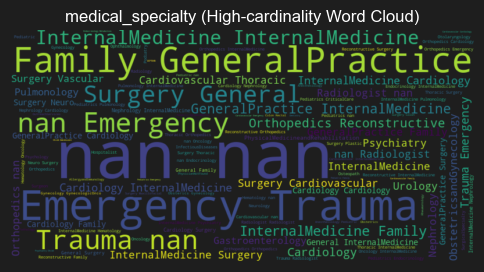

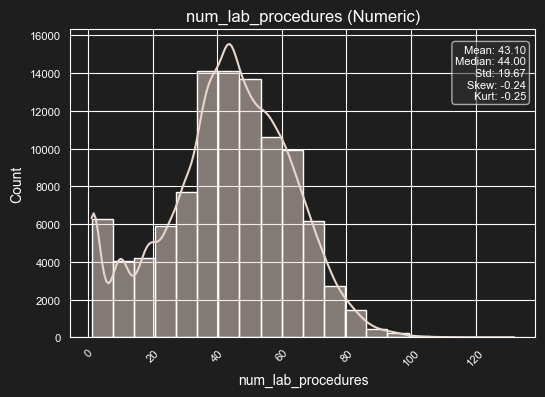

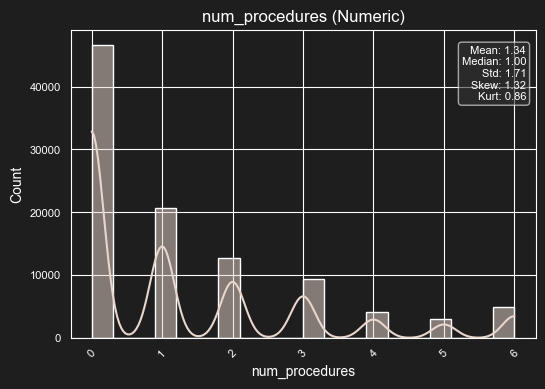

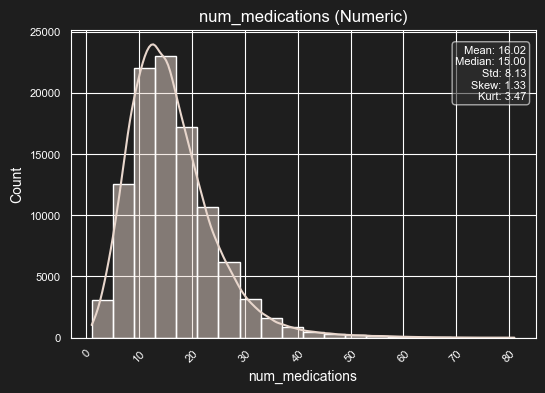

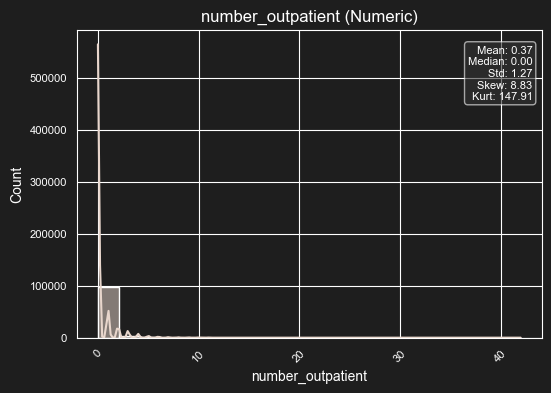

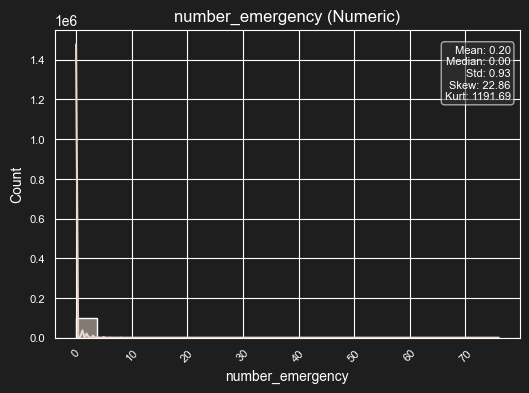

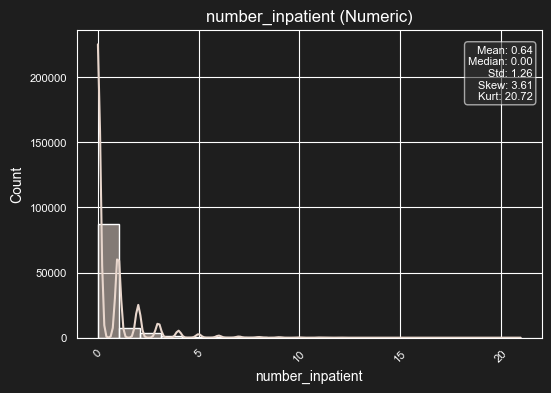

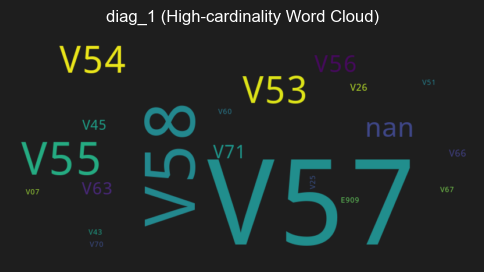

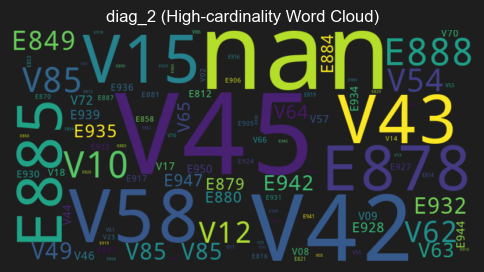

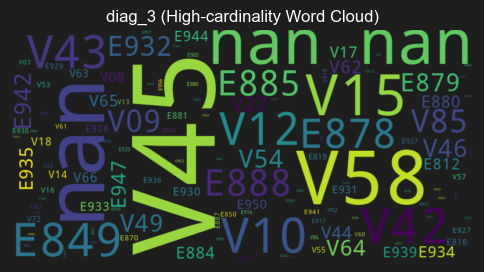

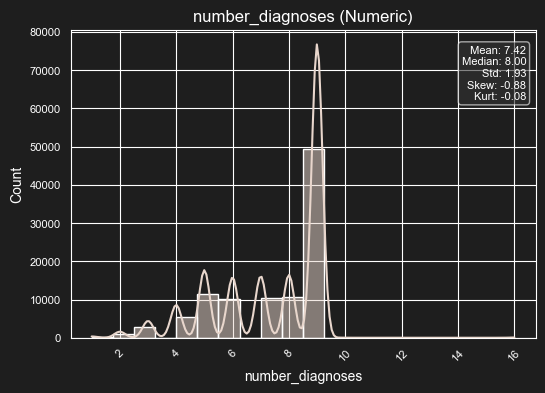

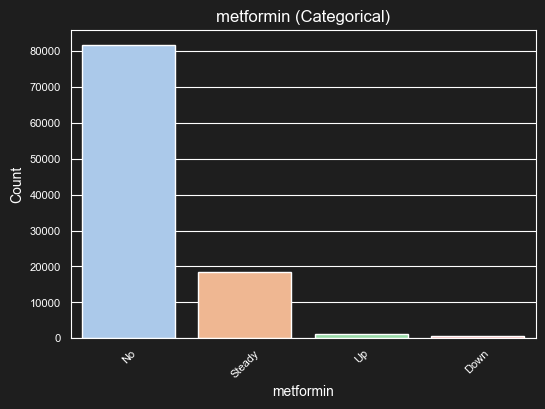

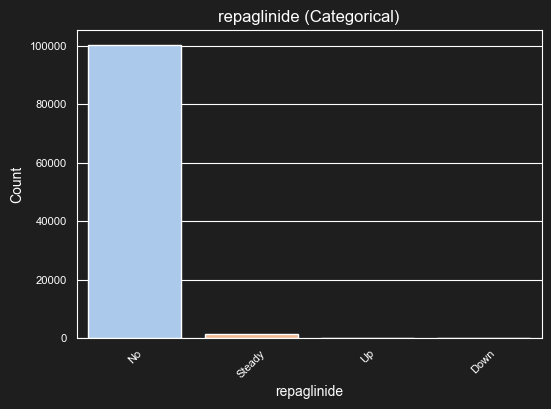

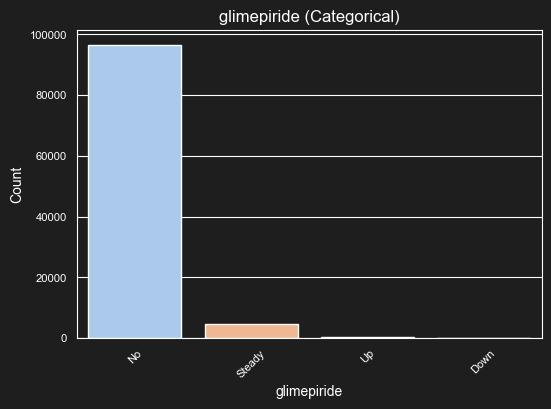

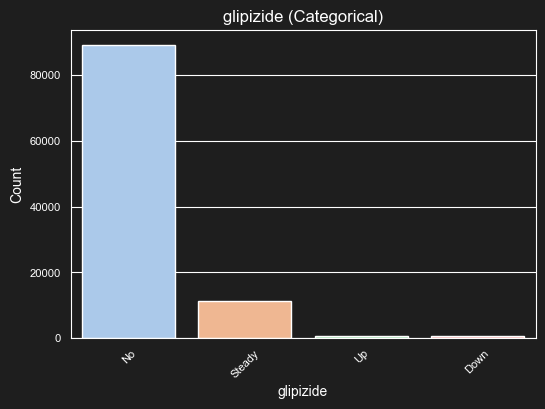

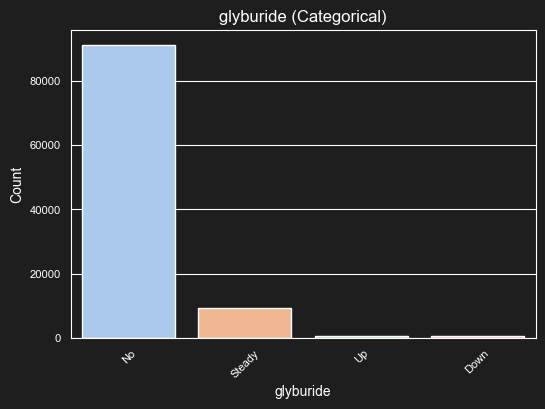

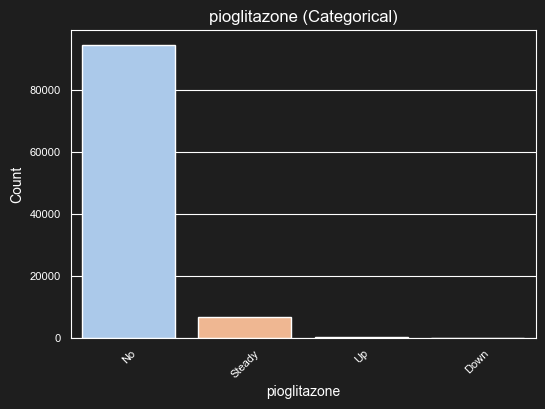

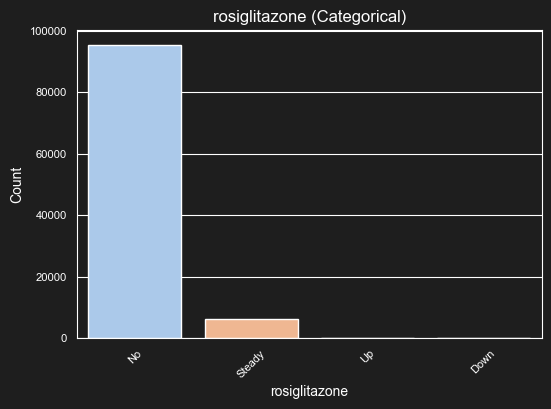

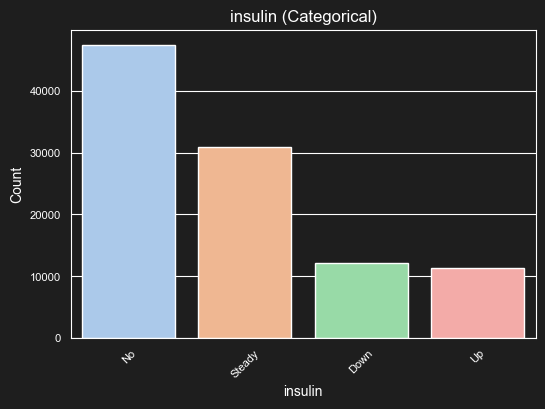

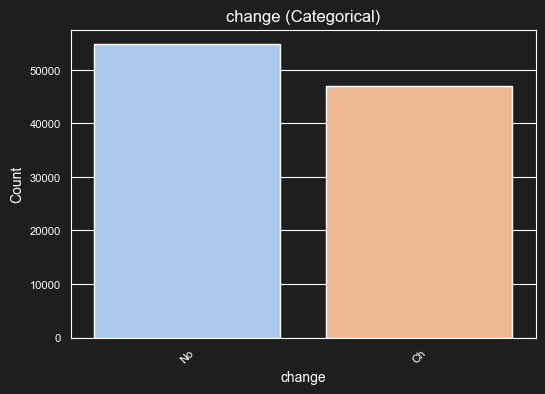

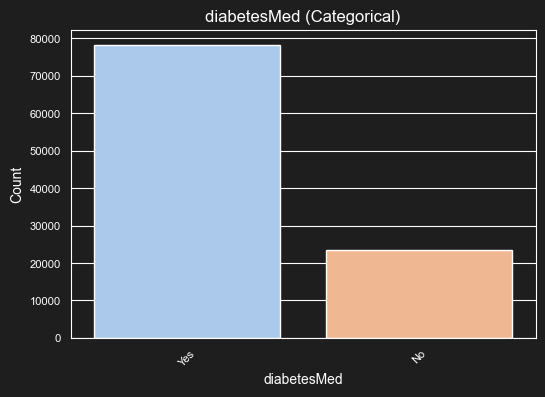

In [88]:
plot_distributions_wordcloud(features, save_folder="charts", high_card_threshold=20)


In [89]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   admission_type_id         101766 non-null  int64 
 4   discharge_disposition_id  101766 non-null  int64 
 5   admission_source_id       101766 non-null  int64 
 6   time_in_hospital          101766 non-null  int64 
 7   payer_code                61510 non-null   object
 8   medical_specialty         51817 non-null   object
 9   num_lab_procedures        101766 non-null  int64 
 10  num_procedures            101766 non-null  int64 
 11  num_medications           101766 non-null  int64 
 12  number_outpatient         101766 non-null  int64 
 13  number_emergency          101766 non-null  int64 
 14  numb

## Cramer-V for categorical variables

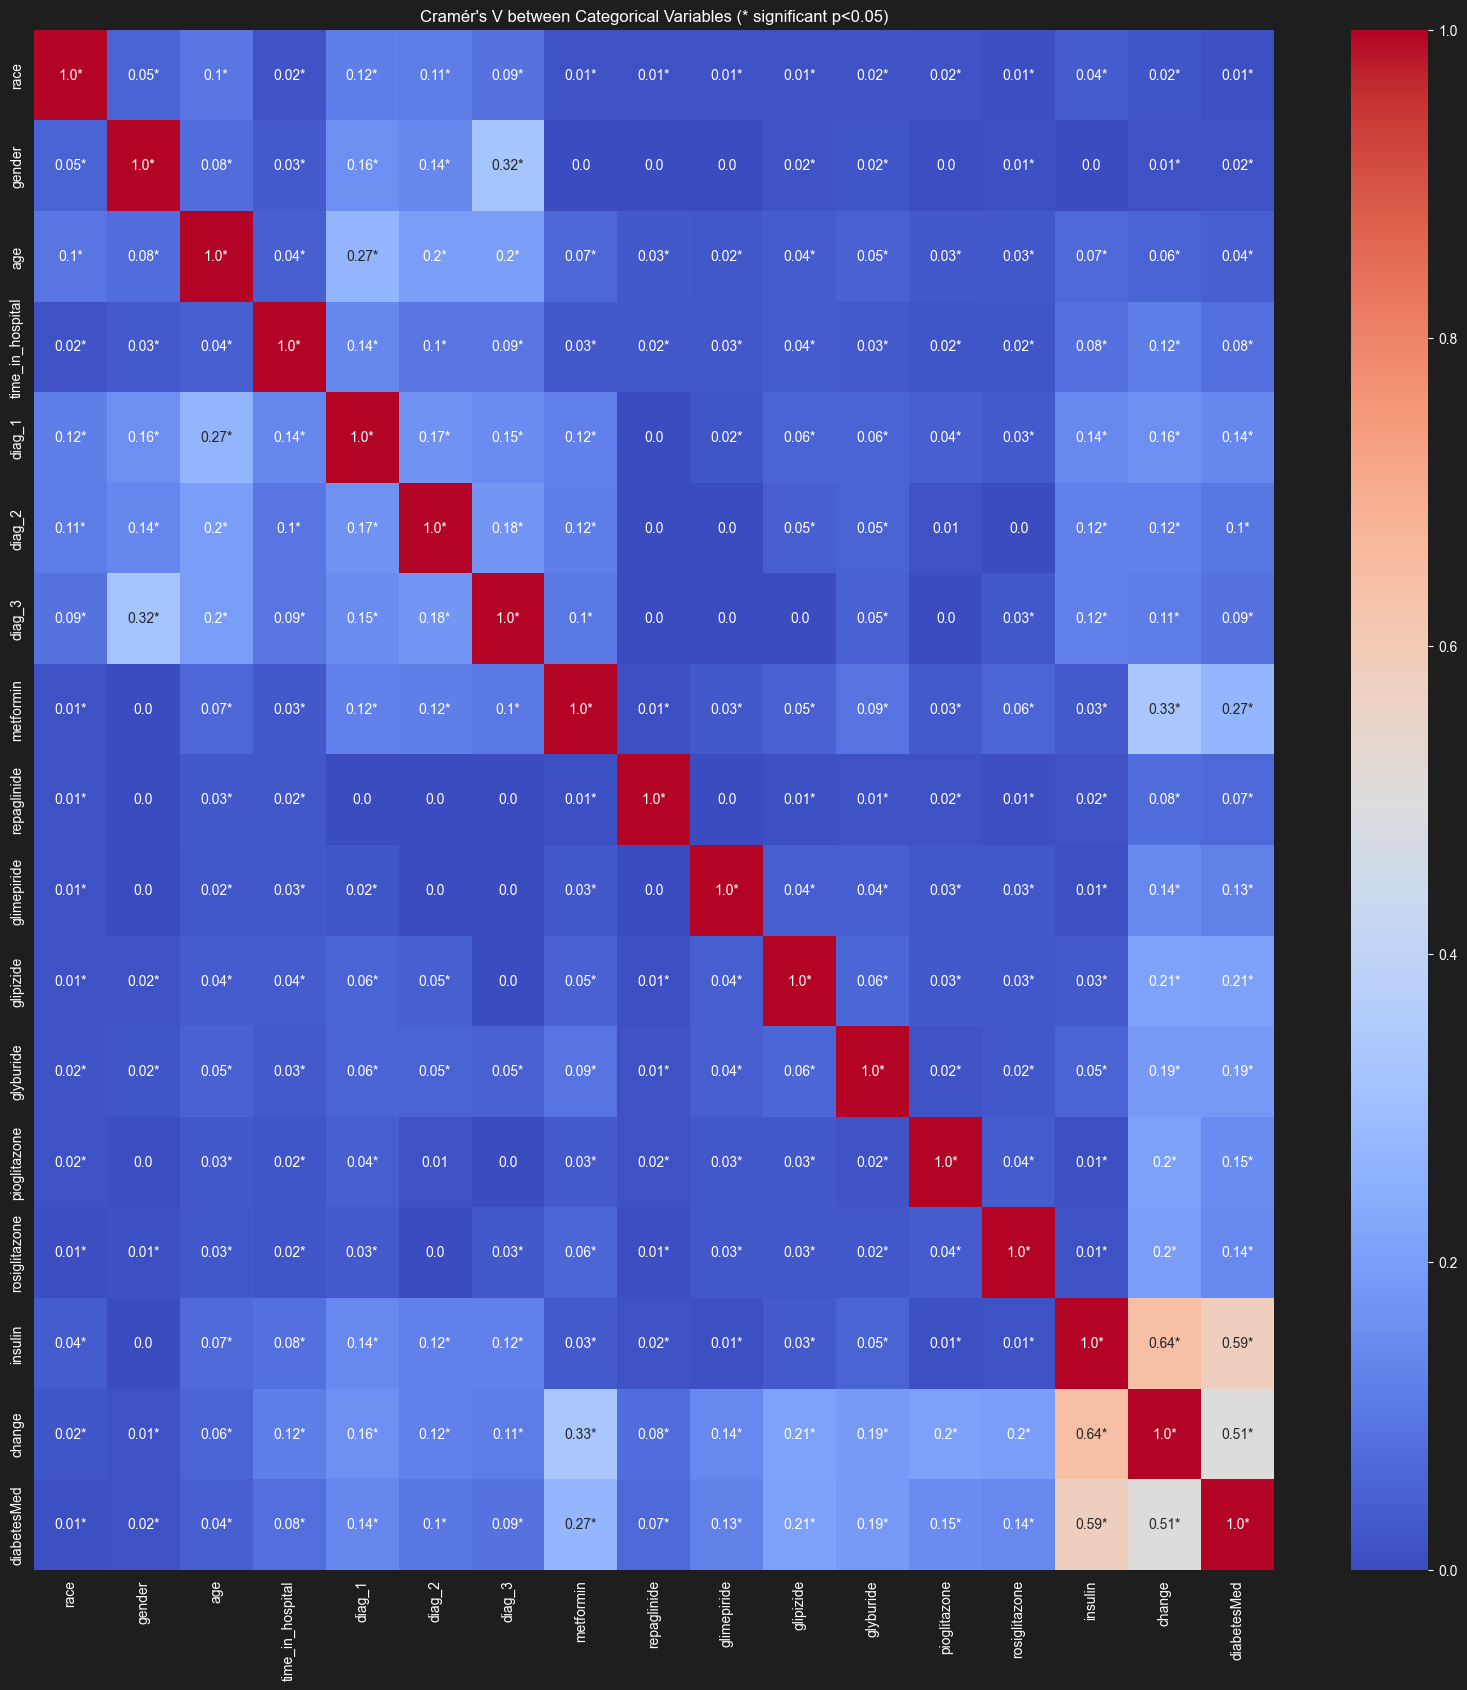

In [90]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
#    Calculate Cramér's V for categorical-categorical association.
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    v = np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))
    return v, p  # return both Cramér's V and p-value

cat_cols = ['race', 'gender', 'age', 'time_in_hospital', 'diag_1', 'diag_2', 'diag_3', 'metformin', 'repaglinide','glimepiride','glipizide', 'glyburide','pioglitazone','rosiglitazone','insulin','change','diabetesMed']
n = len(cat_cols)

cramers_matrix = pd.DataFrame(np.zeros((n, n)), index=cat_cols, columns=cat_cols)
pvalue_matrix = pd.DataFrame(np.ones((n, n)), index=cat_cols, columns=cat_cols)

# Compute pairwise Cramér's V and p-value
for i in cat_cols:
    for j in cat_cols:
        v, p = cramers_v(features[i], features[j])
        cramers_matrix.loc[i, j] = v
        pvalue_matrix.loc[i, j] = p

# Prepare annotations (add * if significant)
annotations = cramers_matrix.round(2).astype(str)
significant = pvalue_matrix < 0.05
annotations = annotations + significant.replace({True: '*', False: ''})

# Dark-themed heatmap
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

plt.figure(figsize=(20, 20))
sns.heatmap(cramers_matrix, annot=annotations, cmap='coolwarm', vmin=0, vmax=1, fmt='')
plt.title("Cramér's V between Categorical Variables (* significant p<0.05)", fontsize=12, color='white')
plt.show()

filename = os.path.join('charts', f"cramer_v_heatmap.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()




## Target Variable

In [91]:
targets.head()

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO


In [92]:
missing_percent = targets.isnull().mean() * 100

top_value_percent = targets.apply(lambda col: col.value_counts(normalize=True, dropna=False).iloc[0] * 100)

summary = pd.DataFrame({
    'missing_%': missing_percent,
    'top_value_%': top_value_percent
})

print(summary)

            missing_%  top_value_%
readmitted        0.0    53.911916


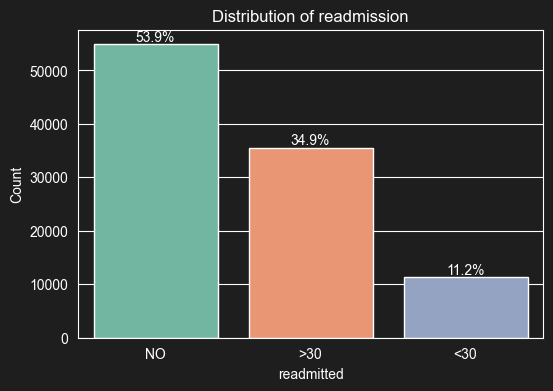

In [93]:
plt.figure(figsize=(6,4))
sns.countplot(data=targets, x='readmitted', palette='Set2')
plt.title(f'Distribution of readmission', fontsize=12)
plt.xlabel('readmitted')
plt.ylabel('Count')

total = len(targets['readmitted'])
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=10)

plt.show()


             feature  cramers_v        p_value
4             diag_1   0.131831   0.000000e+00
5             diag_2   0.110470  2.970695e-223
6             diag_3   0.104835  4.000059e-182
16       diabetesMed   0.061469   1.175514e-84
3   time_in_hospital   0.050898  3.178508e-100
14           insulin   0.050092  2.126586e-108
15            change   0.045838   1.362061e-47
2                age   0.038082   9.348415e-56
7          metformin   0.022037   2.445917e-20
0               race   0.020836   5.957899e-17
8        repaglinide   0.016132   7.302647e-11
10         glipizide   0.015398   6.551146e-10
13     rosiglitazone   0.013485   1.161873e-07
1             gender   0.012822   1.447272e-07
12      pioglitazone   0.010845   4.042850e-05
9        glimepiride   0.007235   1.064076e-02
11         glyburide   0.004430   1.249143e-01


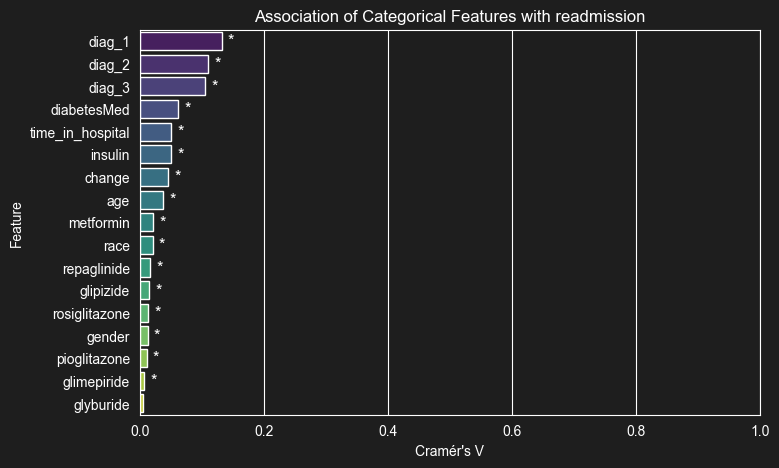

In [94]:
cat_features = cat_cols

results = []

for col in cat_features:
    v, p = cramers_v(features[col], targets['readmitted'])
    results.append({'feature': col, 'cramers_v': v, 'p_value': p})

association_df = pd.DataFrame(results).sort_values(by='cramers_v', ascending=False)
print(association_df)

plt.figure(figsize=(8, 5))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

ax = sns.barplot(data=association_df, x='cramers_v', y='feature', palette='viridis')

for bar, p in zip(ax.patches, association_df['p_value']):
    if p < 0.05:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        ax.text(width + 0.01, y, '*', va='center', color='white', fontsize=12)

plt.xlabel("Cramér's V")
plt.ylabel("Feature")
plt.title(f"Association of Categorical Features with readmission", fontsize=12, color='white')
plt.xlim(0, 1)
plt.show()

filename = os.path.join('charts', f"cramer_v_association_with_readmission.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()

## Correlation against each other

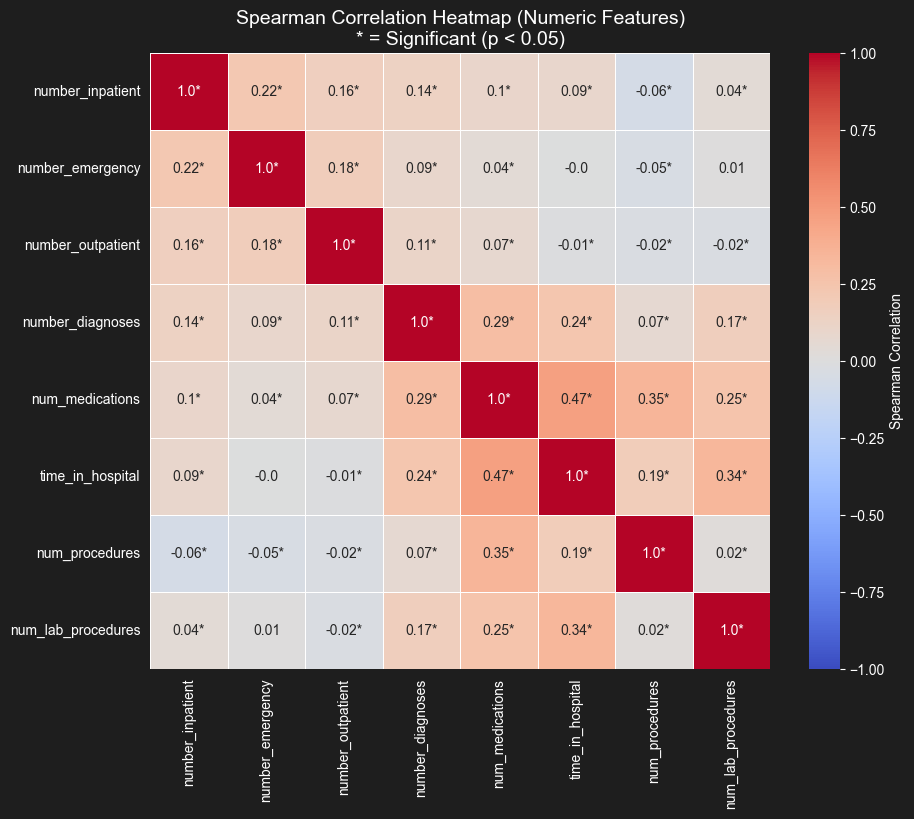

In [95]:
from scipy.stats import spearmanr

num_cols = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital', 'num_procedures', 'num_lab_procedures']


# Initialize empty matrices
n = len(num_cols)
corr_matrix = pd.DataFrame(np.zeros((n, n)), index=num_cols, columns=num_cols)
pval_matrix = pd.DataFrame(np.ones((n, n)), index=num_cols, columns=num_cols)

# Compute pairwise Spearman correlations and p-values
for i in range(n):
    for j in range(n):
        corr, p = spearmanr(features[num_cols[i]], features[num_cols[j]], nan_policy='omit')
        corr_matrix.iloc[i, j] = corr
        pval_matrix.iloc[i, j] = p

# Create annotation matrix (correlation with stars for significance)
annotations = corr_matrix.round(2).astype(str)
stars = pval_matrix.applymap(lambda p: '*' if p < 0.05 else '')
annotations = annotations + stars

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

sns.heatmap(
    corr_matrix, 
    annot=annotations, fmt="", 
    cmap="coolwarm", vmin=-1, vmax=1, 
    linewidths=0.5, 
    cbar_kws={'label': 'Spearman Correlation'}
)

plt.title("Spearman Correlation Heatmap (Numeric Features)\n* = Significant (p < 0.05)", fontsize=14, color='white')
plt.show()

## Spearman Correlation (numeric variables) against the target

In [96]:
from pandas.api.types import CategoricalDtype


target_order = ['NO', '<30', '>30']

cat_type = CategoricalDtype(categories=target_order, ordered=True)
targets['target_encoded'] = targets['readmitted'].astype(cat_type).cat.codes


              feature  spearman_corr        p_value
0    number_inpatient       0.207441   0.000000e+00
1    number_emergency       0.117819   0.000000e+00
2   number_outpatient       0.109084  6.800265e-267
3    number_diagnoses       0.103599  8.505038e-241
4     num_medications       0.063024   4.462007e-90
5    time_in_hospital       0.051194   4.977306e-60
6      num_procedures      -0.048064   4.042227e-53
7  num_lab_procedures       0.038169   3.947867e-34


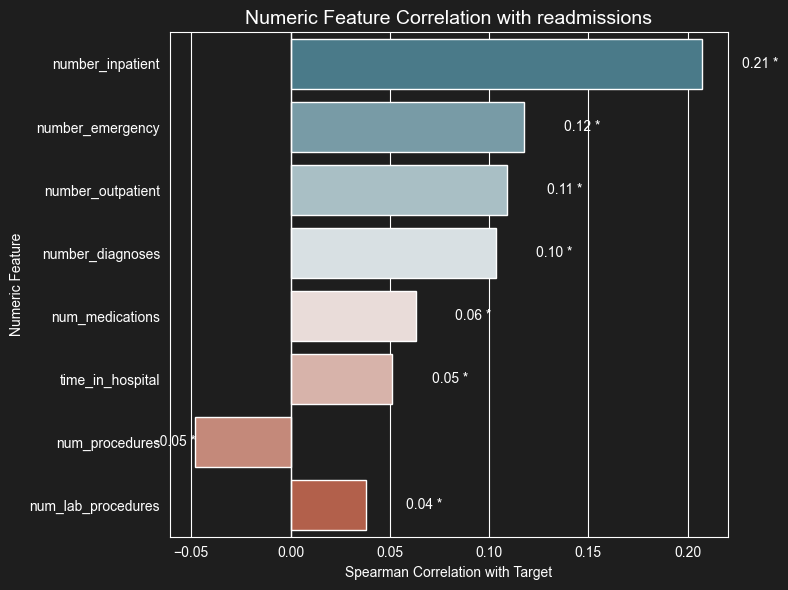

In [97]:
numeric_features = ['number_inpatient', 'number_emergency', 'number_outpatient', 'number_diagnoses', 'num_medications', 'time_in_hospital', 'num_procedures', 'num_lab_procedures']

results = []
for col in numeric_features:
    rho, p_value = spearmanr(features[col], targets['target_encoded'])
    results.append({'feature': col, 'spearman_corr': rho, 'p_value': p_value})

correlation_df = pd.DataFrame(results).sort_values(by='spearman_corr', key=abs, ascending=False)

print(correlation_df)


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.set_style("darkgrid")
plt.rcParams['figure.facecolor'] = '#1E1E1E'
plt.rcParams['axes.facecolor'] = '#1E1E1E'
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

ax = sns.barplot(
    data=correlation_df,
    x='spearman_corr',
    y='feature',
    palette=sns.diverging_palette(220, 20, n=len(correlation_df), center="light")
)

# Add numeric labels at the end of each bar
for bar, corr, p in zip(ax.patches, correlation_df['spearman_corr'], correlation_df['p_value']):
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    ax.text(
        width + 0.02*np.sign(width), y,
        f"{corr:.2f}" + (" *" if p < 0.05 else ""),
        va='center', color='white', fontsize=10
    )

plt.xlabel("Spearman Correlation with Target")
plt.ylabel("Numeric Feature")
plt.title("Numeric Feature Correlation with readmissions", fontsize=14, color='white')
plt.axvline(0, color='white', linewidth=1)
plt.tight_layout()
plt.show()

filename = os.path.join('charts', f"spearman_correlation_association_with_readmission.png")
plt.savefig(filename, bbox_inches='tight', dpi=300)
plt.close()